In [2]:
_=!git clone https://github.com/Sht97/Accelerometer-Gyro-dataset.git dataset
!cd dataset && git pull

Already up to date.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import tensorflow as tf
from scikitplot.metrics import plot_confusion_matrix#Esta librería toca instalarla "conda install -c conda-forge scikit-plot"
from sklearn.model_selection import train_test_split

In [4]:
def get_conv_model_A(num_classes,num_filtros,size_filtros, compile=True):
    
    #print("using",num_classes,"classes")
    inputs = tf.keras.Input(shape=(300,6), name="input_1")
    layers = tf.keras.layers.Conv1D(num_filtros,size_filtros, activation="relu", padding="SAME")(inputs)
    layers = tf.keras.layers.Flatten()(layers)
    layers = tf.keras.layers.Dense(16, activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dropout(0.2)(layers)
    predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
    if compile:
        model.compile(optimizer=opt,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    return model


def train(model, batch_size, epochs, model_name=""):
    model.reset_states()
    h = model.fit(x_train, y_train, epochs=epochs,
              batch_size=batch_size,
              validation_data=(x_test, y_test),verbose=0)
    #metrics = model.evaluate(x_test, y_test)
    return h #{k:v for k,v in zip (model.metrics_names, metrics)}

In [5]:
archivos  = ['Daniel/Activacion','Daniel/Complejo','Daniel/Encender','Daniel/X'
             ,'Raul/Activacion','Raul/Complejo','Raul/Encender','Raul/X']
archivos2 = ['Daniel/Encender','Raul/Encender','Daniel/Complejo','Raul/Complejo','Daniel/X','Raul/X']

 
G0 = ['Daniel/Activacion','Raul/Activacion']  # 0
G1 = ['Daniel/Encender','Raul/Encender']    # 1 
G2 = ['Daniel/Complejo','Raul/Complejo']    # 2
G3 = ['Daniel/X','Raul/X']           # 3

x = []
y = []
for archivo in archivos:

  df1=pd.read_csv('dataset/'+ archivo +'.csv')

  cambios=df1[df1['Tiempo']=='Order'].index.tolist()

  for i in cambios:
    gesto1=df1[(df1.index>=i-300)&(df1.index<i)].astype(int)
    gesto1 = gesto1.to_numpy()

    m=np.fft.rfft(gesto1[:,2:8],axis=0)
    f=25
    ones=np.ones(f)
    zeros=np.zeros(m.shape[0]-f)
    c=np.concatenate((ones,zeros))
    clean=m*c.reshape(m.shape[0],1)
    m=np.fft.irfft(clean,axis=0)
    x.append(m)

    #x.append(gesto1[:,2:8])

    if archivo in G0:
      y.append(0)
    elif archivo in G1:
      y.append(1)
    elif archivo in G2:
      y.append(2)
    else:
      y.append(3)



x = np.array(x)
y = np.array(y)

#x = (x+32762)/65536

x_train,x_test,y_train,y_test =  train_test_split(x,y)


print(x_train.shape)
print(y_train)

(993, 300, 6)
[3 0 2 1 3 3 1 3 1 0 1 0 3 2 2 1 1 0 1 2 1 3 1 2 3 0 2 0 1 3 3 0 1 2 2 2 1
 3 0 2 3 0 3 1 0 1 1 0 2 0 2 1 2 1 1 1 3 3 1 3 0 3 2 1 0 0 0 2 3 3 3 3 0 1
 1 2 3 1 2 3 1 3 0 1 1 0 2 1 1 3 1 2 3 0 1 3 3 3 3 2 2 1 1 1 3 0 2 1 1 0 0
 3 1 1 1 1 2 1 3 1 2 3 1 0 3 1 1 1 0 1 2 2 0 3 2 0 1 1 3 1 3 2 3 3 1 0 3 1
 1 3 3 1 3 3 1 0 1 1 0 0 2 2 1 3 1 0 0 1 1 3 3 2 1 1 1 1 1 2 1 2 2 1 2 2 0
 1 1 0 0 1 1 2 3 1 1 2 1 1 1 1 0 2 1 3 3 3 3 1 2 1 0 1 1 2 1 1 0 3 0 1 2 3
 0 3 2 3 1 2 2 3 2 2 1 2 0 1 2 1 2 3 1 1 1 0 0 1 0 1 1 3 2 2 3 3 3 1 3 3 3
 3 0 1 0 3 2 0 3 1 1 1 1 2 2 1 2 1 1 1 1 0 3 1 2 1 3 2 0 1 0 2 1 3 2 3 2 0
 0 1 1 2 0 0 2 2 0 1 0 0 2 3 1 1 3 0 2 3 1 1 0 3 0 1 1 2 1 1 3 3 1 2 3 3 0
 3 1 0 0 0 0 3 3 0 1 1 1 2 2 0 2 1 0 1 0 1 0 3 3 3 1 0 3 1 0 0 1 1 0 1 3 2
 0 1 1 1 2 1 1 1 2 3 0 3 2 2 1 1 1 0 1 3 2 2 1 1 0 0 2 1 0 2 1 2 2 2 1 1 2
 3 2 2 1 3 0 1 3 3 0 0 0 1 2 1 1 3 1 0 3 1 2 1 0 0 3 0 1 0 1 1 1 0 1 2 0 2
 1 1 1 0 1 1 1 2 3 1 1 1 0 3 1 3 1 0 3 0 3 1 3 2 2 2 0 1 3 0 0 0 1 1 1 0 3
 0 2 2 0 1 

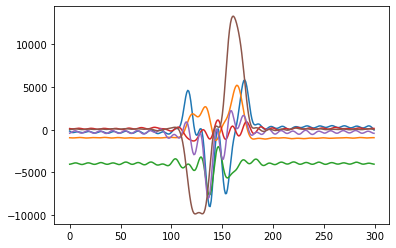

In [6]:
plt.plot(x[4])
plt.show()

In [7]:
model = get_conv_model_A(4,30,200)
a = train(model, batch_size=30, epochs=50, model_name="model_A")

In [8]:
metrics = model.evaluate(x_train, y_train,verbose=0)
print(metrics)


[0.3472258448600769, 0.8056395053863525]


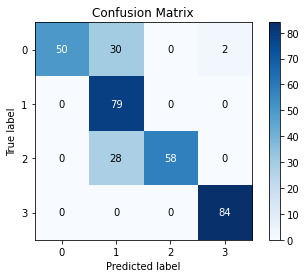

In [9]:
test_preds = model.predict(x_test).argmax(axis=1)
plot_confusion_matrix(y_test, test_preds, normalize=False)

In [62]:
model.summary() 

Model: "functional_197"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 6)]          0         
_________________________________________________________________
conv1d_98 (Conv1D)           (None, 300, 30)           36030     
_________________________________________________________________
flatten_98 (Flatten)         (None, 9000)              0         
_________________________________________________________________
dense_98 (Dense)             (None, 16)                144016    
_________________________________________________________________
dropout_98 (Dropout)         (None, 16)                0         
_________________________________________________________________
output_1 (Dense)             (None, 4)                 68        
Total params: 180,114
Trainable params: 180,114
Non-trainable params: 0
______________________________________________

In [43]:
print(a.history['loss'][-1])
print(a.history['accuracy'][-1])
print(a.history['val_loss'][-1])
print(a.history['val_accuracy'][-1])

1.059922695159912
0.48943090438842773
1.2181413173675537
0.5145630836486816


In [21]:
datos = {'batch_size': [],
        'sizeFilter': [],
        'numFilter': [],
        '#': [],
        'LssTrain': [],
        'AccTrain': [],
        'LssVal': [],
        'AccVal': []
        }

datos = pd.DataFrame(datos, columns = ['batch_size','sizeFilter','numFilter','#','LssTrain','AccTrain','LssVal','AccVal'])

for i in [10,100]:
    print(i,' batch size')
    for j in [10,30,60]:
        print(j,' sizefilter')
        for k in [5,10,20,30]:
            print(k,' numFilter')
            for l in range(10):
                model = get_conv_model_A(4,k,j)
                a = train(model, batch_size=i, epochs=50, model_name="model_A")
                
                
                
                fila = {'batch_size': [i],
                        'sizeFilter': [j],
                        'numFilter': [k],
                        '#': [l],
                        'LssTrain': [a.history['loss'][-1]],
                        'AccTrain': [a.history['accuracy'][-1]],
                        'LssVal': [a.history['val_loss'][-1]],
                        'AccVal': [a.history['val_accuracy'][-1]]
                        }
                if a.history['val_accuracy'][-1] > 0.9:
                    model.save_weights('./checkpoints/checkpoint_sf'+str(j)+'_bs'+str(i)+'_nf'+str(k)+'_#'+str(l))
                    print('_sf'+str(j)+'_bs'+str(i)+'_nf'+str(k)+'_#'+str(l))

                fila = pd.DataFrame(fila, columns = ['batch_size','sizeFilter','numFilter','#','LssTrain','AccTrain','LssVal','AccVal'])
                datos = datos.append(fila,ignore_index=True)
                

10  batch size
10  sizefilter
5  numFilter
10  numFilter
20  numFilter
30  numFilter
30  sizefilter
5  numFilter
10  numFilter
20  numFilter
30  numFilter
60  sizefilter
5  numFilter
10  numFilter
20  numFilter
30  numFilter
100  batch size
10  sizefilter
5  numFilter
10  numFilter
20  numFilter
30  numFilter
30  sizefilter
5  numFilter
_sf30_bs100_nf5_#0
_sf30_bs100_nf5_#2
10  numFilter
20  numFilter
30  numFilter
60  sizefilter
5  numFilter
_sf60_bs100_nf5_#7
10  numFilter
_sf60_bs100_nf10_#5
20  numFilter
_sf60_bs100_nf20_#5
30  numFilter


In [22]:
datos

,batch_size,sizeFilter,numFilter,#,LssTrain,AccTrain,LssVal,AccVal
0,10.0,10.0,5.0,0.0,1.231452,0.425982,1.343522,0.374622
1,10.0,10.0,5.0,1.0,1.351716,0.346425,4.609452,0.268882
2,10.0,10.0,5.0,2.0,1.328861,0.464250,8.250954,0.483384
3,10.0,10.0,5.0,3.0,0.909555,0.615307,1.638803,0.613293
4,10.0,10.0,5.0,4.0,1.078606,0.574018,1.519714,0.477341
...,...,...,...,...,...,...,...,...
235,100.0,60.0,30.0,5.0,1.342029,0.360524,1.415861,0.277946
236,100.0,60.0,30.0,6.0,0.576378,0.767372,0.475264,0.785498
237,100.0,60.0,30.0,7.0,0.623905,0.695871,4.531975,0.694864
238,100.0,60.0,30.0,8.0,1.205234,0.457200,1.148853,0.407855


In [23]:
datos.sort_values(by=['AccVal'])
mejores = datos[datos['AccVal']>0.8]
mejores

,batch_size,sizeFilter,numFilter,#,LssTrain,AccTrain,LssVal,AccVal
6,10.0,10.0,5.0,6.0,2.091283,0.802618,2.867339,0.830816
13,10.0,10.0,10.0,3.0,1.844589,0.822759,0.568687,0.851964
29,10.0,10.0,20.0,9.0,0.628260,0.801611,5.566585,0.864048
83,10.0,60.0,5.0,3.0,0.478440,0.783484,3.789937,0.803625
160,100.0,30.0,5.0,0.0,5.543890,0.930514,10.506083,0.957704
162,100.0,30.0,5.0,2.0,2.811087,0.910373,11.872541,0.936556
207,100.0,60.0,5.0,7.0,2.450988,0.920443,1.618379,0.954683
215,100.0,60.0,10.0,5.0,0.508304,0.938570,0.774674,0.972810
218,100.0,60.0,10.0,8.0,0.651632,0.815710,1.319589,0.842900
225,100.0,60.0,20.0,5.0,0.310802,0.897281,1.463006,0.951662


In [24]:
mejores.sort_values(['AccVal'])

,batch_size,sizeFilter,numFilter,#,LssTrain,AccTrain,LssVal,AccVal
83,10.0,60.0,5.0,3.0,0.478440,0.783484,3.789937,0.803625
6,10.0,10.0,5.0,6.0,2.091283,0.802618,2.867339,0.830816
218,100.0,60.0,10.0,8.0,0.651632,0.815710,1.319589,0.842900
13,10.0,10.0,10.0,3.0,1.844589,0.822759,0.568687,0.851964
29,10.0,10.0,20.0,9.0,0.628260,0.801611,5.566585,0.864048
162,100.0,30.0,5.0,2.0,2.811087,0.910373,11.872541,0.936556
225,100.0,60.0,20.0,5.0,0.310802,0.897281,1.463006,0.951662
207,100.0,60.0,5.0,7.0,2.450988,0.920443,1.618379,0.954683
160,100.0,30.0,5.0,0.0,5.543890,0.930514,10.506083,0.957704
215,100.0,60.0,10.0,5.0,0.508304,0.938570,0.774674,0.972810


In [ ]:
# observaciones
# un batch size mas grande parece tener mejores resultados en general
# el filter size enorme parece ser bueno pero no proporciona un modelo libiano
# del numero de filtros no se tiene certeza ya que se encuentran modelos muuy buenos con pocos filtros al igual que con muchos


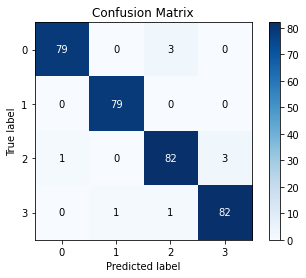

In [25]:
model = get_conv_model_A(4,10,60)
model.load_weights('./checkpoints/checkpoint_sf60_bs100_nf10_#5')
test_preds = model.predict(x_test).argmax(axis=1)
plot_confusion_matrix(y_test, test_preds, normalize=False)